# Clustering: DBSCAN

**DBSCAN** (**D**ensity-**B**ased **S**patial **C**lustering of **A**pplications with **N**oise)  
groups points that are closely packed together (i.e., with many nearby neighbors),  
and marks points that lie alone in low-density regions as noise.

It uses two parameters:  

* $\epsilon$ (epsilon): radius of the neighborhood around a point.  

* $\text{minPts}$: minimum number of points (including the point itself) required to form a dense region.
**Dataset**:  

| Point | Coordinates |
| ----- | ----------- |
| A     | (1, 1)      |
| B     | (2, 1)      |
| C     | (4, 3)      |
| D     | (5, 4)      |
| E     | (3, 4)      |

* **Step 0: Choose Parameters**  

Let’s choose:

* $\epsilon = 1.5$  

* $minPts = 2$ (to keep it simple for this small dataset).  

* **Step 1: Compute Distance Matrix**  

We compute Euclidean distances (already computed in your HAC example):  

|   | A   | B   | C   | D   | E   |
| - | --- | --- | --- | --- | --- |
| A | 0.0 | 1.0 | 3.6 | 5.0 | 3.6 |
| B | 1.0 | 0.0 | 2.8 | 4.2 | 3.2 |
| C | 3.6 | 2.8 | 0.0 | 1.4 | 1.4 |
| D | 5.0 | 4.2 | 1.4 | 0.0 | 2.0 |
| E | 3.6 | 3.2 | 1.4 | 2.0 | 0.0 |

* **Step 2: Identify Core, Border, and Noise Points**  

A: Neighbors within $\epsilon$ = [B] $\rightarrow$ only 1 neighbor $\rightarrow$ not core  
B: Neighbors within $\epsilon$ = [A] $\rightarrow$ only 1 neighbor $\rightarrow$ not core  
C: Neighbors within $\epsilon$ = [D, E] $\rightarrow$ 2 neighbors $\rightarrow$ ✅ core  
D: Neighbors within $\epsilon$ = [C] $\rightarrow$ only 1 $\rightarrow$ not core  
E: Neighbors within $\epsilon$ = [C] $\rightarrow$ only 1 $\rightarrow$ not core  

So:  

Core points: C  
Border points: D, E (because they're close to a core point)  
Noise: A, B (not core, and not close to a core).  

* **Step 3: Form Clusters**  

Start with core point C → new cluster Cluster 1  
Add C's ε-neighbors → D and E  
$\rightarrow$ D and E are added to Cluster 1 as border points  

So:  

Cluster 1 = {C, D, E}  
A and B remain unclustered (noise)  

**Final Result**:  

| Cluster | Points  |
| ------- | ------- |
| 1       | C, D, E |
| Noise   | A, B    |


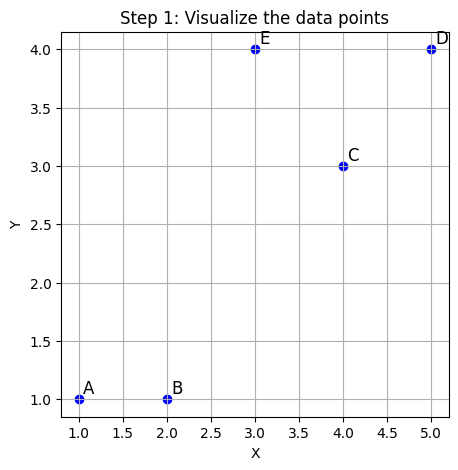

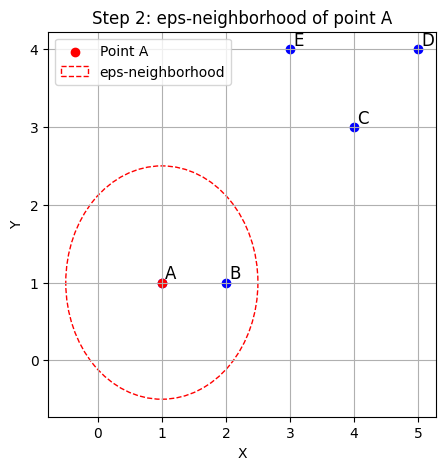

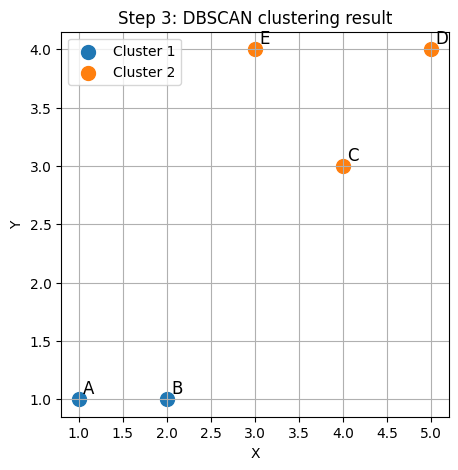

Point A is assigned to Cluster 1.
Point B is assigned to Cluster 1.
Point C is assigned to Cluster 2.
Point D is assigned to Cluster 2.
Point E is assigned to Cluster 2.


In [5]:
import numpy as np
from sklearn.cluster import DBSCAN

# Step-by-step DBSCAN explanation with a small 2D dataset

import matplotlib.pyplot as plt

# 1. Define the dataset
# Points: A(1,1), B(2,1), C(4,3), D(5,4), E(3,4)
points = np.array([
    [1, 1],  # A
    [2, 1],  # B
    [4, 3],  # C
    [5, 4],  # D
    [3, 4],  # E
])
labels_names = ['A', 'B', 'C', 'D', 'E']

# 2. Visualize the points
plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], color='blue')
for i, txt in enumerate(labels_names):
    plt.annotate(txt, (points[i, 0]+0.05, points[i, 1]+0.05), fontsize=12)
plt.title("Step 1: Visualize the data points")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

# 3. Choose DBSCAN parameters
# Let's set eps=1.5 (radius), min_samples=2 (minimum points to form a cluster)
eps = 1.5
min_samples = 2

# 4. Visualize the eps-neighborhood for point A
plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], color='blue')
plt.scatter(points[0, 0], points[0, 1], color='red', label='Point A')
circle = plt.Circle((points[0, 0], points[0, 1]), eps, color='red', fill=False, linestyle='--', label='eps-neighborhood')
plt.gca().add_patch(circle)
for i, txt in enumerate(labels_names):
    plt.annotate(txt, (points[i, 0]+0.05, points[i, 1]+0.05), fontsize=12)
plt.title("Step 2: eps-neighborhood of point A")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

# 5. Run DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples)
db_labels = db.fit_predict(points)

# 6. Visualize the clustering result
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
plt.figure(figsize=(5, 5))
for i in range(len(points)):
    if db_labels[i] == -1:
        plt.scatter(points[i, 0], points[i, 1], color='k', marker='x', s=100, label='Noise' if i == 0 else "")
    else:
        plt.scatter(points[i, 0], points[i, 1], color=colors[db_labels[i]], s=100, label=f'Cluster {db_labels[i]+1}' if f'Cluster {db_labels[i]+1}' not in plt.gca().get_legend_handles_labels()[1] else "")
    plt.annotate(labels_names[i], (points[i, 0]+0.05, points[i, 1]+0.05), fontsize=12)
plt.title("Step 3: DBSCAN clustering result")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

# 7. Print cluster assignments
for i, name in enumerate(labels_names):
    label = db_labels[i]
    if label == -1:
        print(f"Point {name} is classified as Noise.")
    else:
        print(f"Point {name} is assigned to Cluster {label+1}.")

# --- Explanations (in English) ---
# Step 1: We plot the five points in 2D space.
# Step 2: We illustrate the eps-neighborhood (radius=1.5) for point A. Any point within this circle is considered a neighbor.
# Step 3: We run DBSCAN. Points with at least 'min_samples' (here, 2) neighbors (including itself) within eps are core points and can form clusters.
#         Points not belonging to any cluster are labeled as noise (black 'x').
#         The plot shows the resulting clusters and noise points.
# The printed output shows the cluster assignment for each point.

In [6]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist

# DBSCAN explanation step-by-step with a small dataset

# Dataset : 5 points in 2D
# | Point | Coordinates |
# | ----- | ----------- |
# | A     | (1, 1)      |
# | B     | (2, 1)      |
# | C     | (4, 3)      |
# | D     | (5, 4)      |
# | E     | (3, 4)      |


# 1. Dataset preparation
points = np.array([
    [1, 1],  # A
    [2, 1],  # B
    [4, 3],  # C
    [5, 4],  # D
    [3, 4],  # E
])
labels_names = ['A', 'B', 'C', 'D', 'E']

# 2. Choix des paramètres DBSCAN
eps = 1.5  # rayon de voisinage
min_samples = 2  # nombre minimum de points pour former un cluster

# 3. Calcul des voisins pour chaque point

dist_matrix = pd.DataFrame(
    cdist(points, points),
    columns=labels_names,
    index=labels_names
)
print("Matrice des distances euclidiennes :")
print(dist_matrix.round(2))

# 4. Application de DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples)
db_labels = db.fit_predict(points)

# 5. Explication étape par étape (en français)
print("\nÉtape 1 : On considère chaque point individuellement.")
for i, name in enumerate(labels_names):
    print(f"Point {name} : {points[i]}")

print(f"\nÉtape 2 : Pour chaque point, on regarde les voisins dans un rayon eps={eps}.")
for i, name in enumerate(labels_names):
    neighbors = [labels_names[j] for j in range(len(points)) if dist_matrix.iloc[i, j] <= eps and i != j]
    print(f"Point {name} a pour voisins (dans eps) : {neighbors}")

print(f"\nÉtape 3 : On identifie les points centraux (core points) :")
for i, name in enumerate(labels_names):
    neighbors_count = sum(dist_matrix.iloc[i, :] <= eps)
    if neighbors_count >= min_samples:
        print(f"Point {name} est un point central (core point) ({neighbors_count} dans eps).")
    else:
        print(f"Point {name} n'est PAS un point central ({neighbors_count} dans eps).")

print("\nÉtape 4 : Construction des clusters par propagation :")
for i, name in enumerate(labels_names):
    label = db_labels[i]
    if label == -1:
        print(f"Point {name} est du bruit (noise).")
    else:
        print(f"Point {name} appartient au cluster {label+1}.")

# Résumé des clusters
clusters = {}
for i, label in enumerate(db_labels):
    if label == -1:
        continue
    clusters.setdefault(label+1, []).append(labels_names[i])
print("\nRésumé des clusters trouvés :")
for k, v in clusters.items():
    print(f"Cluster {k} : {v}")

Matrice des distances euclidiennes :
      A     B     C     D     E
A  0.00  1.00  3.61  5.00  3.61
B  1.00  0.00  2.83  4.24  3.16
C  3.61  2.83  0.00  1.41  1.41
D  5.00  4.24  1.41  0.00  2.00
E  3.61  3.16  1.41  2.00  0.00

Étape 1 : On considère chaque point individuellement.
Point A : [1 1]
Point B : [2 1]
Point C : [4 3]
Point D : [5 4]
Point E : [3 4]

Étape 2 : Pour chaque point, on regarde les voisins dans un rayon eps=1.5.
Point A a pour voisins (dans eps) : ['B']
Point B a pour voisins (dans eps) : ['A']
Point C a pour voisins (dans eps) : ['D', 'E']
Point D a pour voisins (dans eps) : ['C']
Point E a pour voisins (dans eps) : ['C']

Étape 3 : On identifie les points centraux (core points) :
Point A est un point central (core point) (2 dans eps).
Point B est un point central (core point) (2 dans eps).
Point C est un point central (core point) (3 dans eps).
Point D est un point central (core point) (2 dans eps).
Point E est un point central (core point) (2 dans eps).

Étap

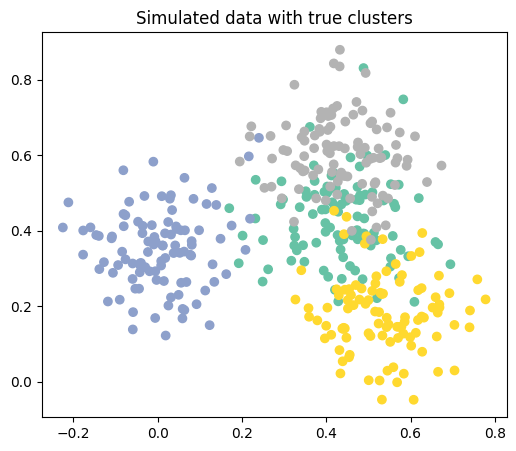

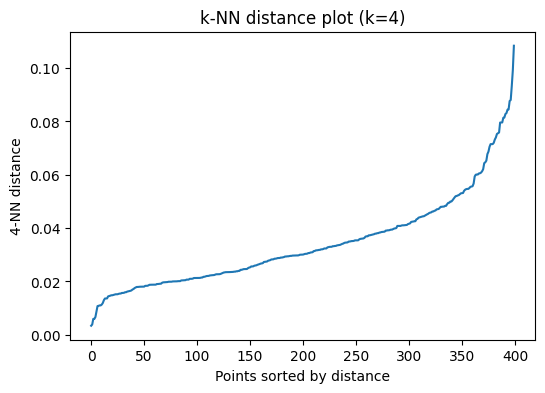

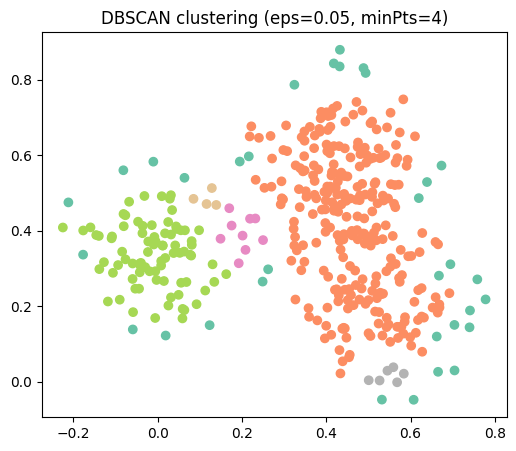

/Users/davidtbo/Library/Mobile Documents/com~apple~CloudDocs/AI/machine_learning/unsupervised_learning/.venv/lib/python3.13/site-packages/sklearn/metrics/cluster/_supervised.py:50: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_pred = type_of_target(labels_pred)
/Users/davidtbo/Library/Mobile Documents/com~apple~CloudDocs/AI/machine_learning/unsupervised_learning/.venv/lib/python3.13/site-packages/sklearn/metrics/cluster/_supervised.py:50: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_pred = type_of_target(labels_pred)


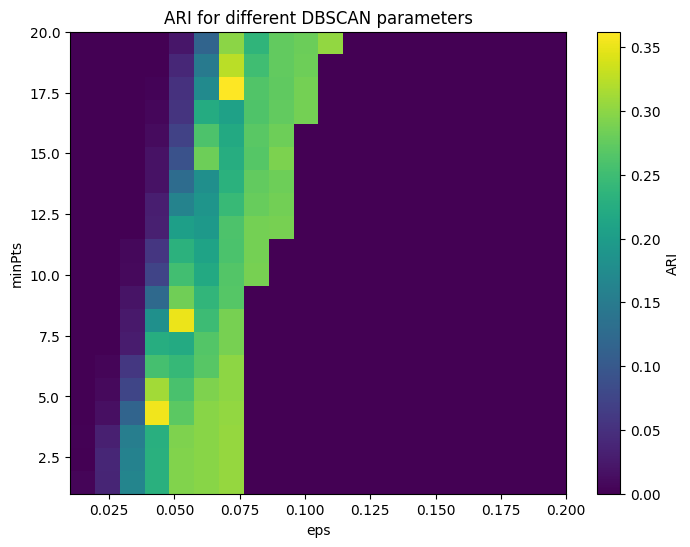

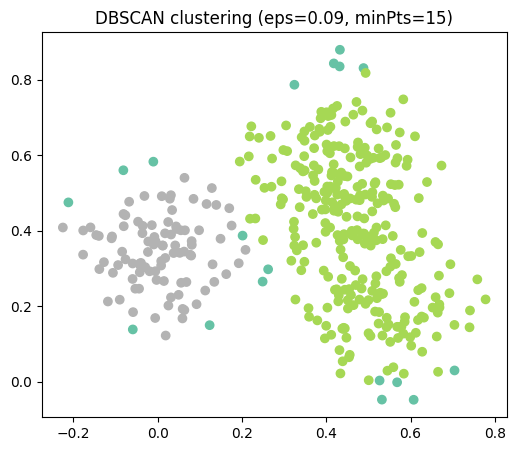

In [7]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score
from sklearn.neighbors import NearestNeighbors

# Import necessary libraries
import matplotlib.pyplot as plt

# cluster.colors equivalent: using matplotlib colormaps
import matplotlib.cm as cm

# --- DBSCAN ---

# --- A first simulated example ---
np.random.seed(2)
n = 400

# Generate 4 clusters with some noise
# In R: runif(4, 0, 1) + rnorm(n, sd = 0.1)
# In Python: np.random.uniform + np.random.normal
x_centers = np.random.uniform(0, 1, 4)
y_centers = np.random.uniform(0, 1, 4)
x = np.vstack([
    np.column_stack((
        np.full(100, x_centers[i]) + np.random.normal(0, 0.1, 100),
        np.full(100, y_centers[i]) + np.random.normal(0, 0.1, 100)
    )) for i in range(4)
])
true_clusters = np.repeat(np.arange(1, 5), 100)

# Plot the data colored by true clusters
plt.figure(figsize=(6, 5))
plt.scatter(x[:, 0], x[:, 1], c=true_clusters, cmap='Set2', marker='o')
plt.title("Simulated data with true clusters")
plt.show()

# --- How to choose hyperparameters? ---
# Heuristics:
# - Choose minPts = 2p (current recommendations) - or more if data is noisy
# - Use a k-NN approach to choose epsilon

# For the example above, minPts = 4
# Plot the k-NN distances to help choose epsilon
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(x)
distances, indices = neighbors_fit.kneighbors(x)
distances = np.sort(distances[:, 3])  # 4th neighbor distance

plt.figure(figsize=(6, 4))
plt.plot(distances)
plt.ylabel("4-NN distance")
plt.xlabel("Points sorted by distance")
plt.title("k-NN distance plot (k=4)")
plt.show()
# From the plot, values around 0.05 seem suitable

# Run DBSCAN with eps=0.05, minPts=4
db = DBSCAN(eps=0.05, min_samples=4).fit(x)
labels = db.labels_

plt.figure(figsize=(6, 5))
# Noise is labeled as -1 in sklearn, so add 1 for color mapping
plt.scatter(x[:, 0], x[:, 1], c=labels + 1, cmap='Set2', marker='o')
plt.title("DBSCAN clustering (eps=0.05, minPts=4)")
plt.show()
# Noise is shown in black

# Note: The k-NN approach for choosing epsilon can be slow if n is large
# An alternative is to use a grid search
# The Adjusted Rand Index (ARI) is used to compare results to true classes
# (This is for illustration only; in real data, the partition is unknown)

minPts_grid = np.arange(1, 21)
eps_grid = np.arange(0.01, 0.21, 0.01)
res_mat = np.zeros((len(minPts_grid), len(eps_grid)))

for i, minPts in enumerate(minPts_grid):
    for j, eps in enumerate(eps_grid):
        db = DBSCAN(eps=eps, min_samples=minPts).fit(x)
        res_mat[i, j] = adjusted_rand_score(true_clusters, db.labels_)

plt.figure(figsize=(8, 6))
plt.imshow(res_mat, aspect='auto', origin='lower',
           extent=[eps_grid[0], eps_grid[-1], minPts_grid[0], minPts_grid[-1]],
           cmap='viridis')
plt.colorbar(label='ARI')
plt.xlabel('eps')
plt.ylabel('minPts')
plt.title('ARI for different DBSCAN parameters')
plt.show()

# Example with eps=0.09, minPts=15
db = DBSCAN(eps=0.09, min_samples=15).fit(x)
labels = db.labels_

plt.figure(figsize=(6, 5))
plt.scatter(x[:, 0], x[:, 1], c=labels + 1, cmap='Set2', marker='o')
plt.title("DBSCAN clustering (eps=0.09, minPts=15)")
plt.show()

# --- Explanations ---
# - The code simulates 4 clusters and applies DBSCAN clustering.
# - The k-NN distance plot helps to select a suitable epsilon value.
# - Grid search with ARI helps to compare clustering results to the true labels.
# - The final plots show the clustering results for different parameter choices.